In [93]:
import math
import matplotlib.pyplot as plt
from itertools import combinations

In [94]:
def f1(net):
    if net >= 0:
        return 1
    else:
        return 0
def df1(net):
    net = 1
    return net
def y1(out):
    return out
def f2(net):
    return (0.5*((net/(1 + abs(net))+1)))
def df2(net):
    return (pow(1-abs(f2(net)),2))
def y2(out):
    if out >= 0.5:
        return 1
    else:
        return 0

In [138]:
class Model(object):
    def __init__(self, activation_function):
        self.w = [0, 0, 0, 0, 0]
        self.x0 = 1

        if activation_function == 1:
            self.f = f1
            self.dF = df1
            self.y = y1
        elif activation_function == 2:
            self.f = f2
            self.dF = df2
            self.y = y2
    def calculate(self, data, norm, log=True):
        epoch = 0
        epoch_m = []
        error = 1
        error_m = []
        while error != 0:
            error = 0
            for i in range(len(data["F"])):
                net = self.w[1]*data["x1"][i] + self.w[2]*data["x2"][i] + self.w[3]*data["x3"][i] + self.w[4]*data["x4"][i] + self.w[0]*self.x0
                out = self.f(net)
                y = self.y(out)
                delta = data["F"][i] - y
                #print("#",str(len(epoch_m)),"     w0 =", round(self.w[0],3), "     w1 =", round(self.w[1],3), "     w2 =", round(self.w[2],3), "     w3 =", round(self.w[3],3), "     w4 =", round(self.w[4],3))
                #print("                        x1=", data["x1"][i],"      x2=",data["x2"][i],"      x3=" ,data["x3"][i],"      x4=",data["x4"][i],"      F=",data["F"][i], "      y=",y)
                self.w[0] = self.w[0] + norm*delta*self.dF(net)*self.x0
                self.w[1] = self.w[1] + norm*delta*self.dF(net)*data["x1"][i]
                self.w[2] = self.w[2] + norm*delta*self.dF(net)*data["x2"][i]
                self.w[3] = self.w[3] + norm*delta*self.dF(net)*data["x3"][i]
                self.w[4] = self.w[4] + norm*delta*self.dF(net)*data["x4"][i]
                if delta != 0:
                    error += 1
            epoch += 1
            error_m.append(error)
            epoch_m.append(epoch)
        if log:
            print('\033[1m'+'\033[4m'+"Обучение завершено. Потребовалось ", str(len(epoch_m)), " эпох."+'\033[0m')
            print("Полученные значения весов: w0 =", round(self.w[0],3), "w1 =", round(self.w[1],3), "w2 =", round(self.w[2],3), "w3 =", round(self.w[3],3), "w4 =", round(self.w[4],3))
        return epoch_m, error_m

    def predict(self, data):

        error = 0

        for i in range(len(data["F"])):
            net = self.w[1]*data["x1"][i] + self.w[2]*data["x2"][i] + self.w[3]*data["x3"][i] + self.w[4]*data["x4"][i] + self.w[0]*self.x0
            out = self.f(net)
            y = self.y(out)

            delta = data["F"][i] - y
            if delta != 0:
                error += 1
        
        return error
        

In [139]:
def find_minimum_set(data, activation_function):
    for i in range(len(data["F"])-1):
        i += 1
        x1 = list(combinations(data["x1"],i))
        x2 = list(combinations(data["x2"],i))
        x3 = list(combinations(data["x3"],i))
        x4 = list(combinations(data["x4"],i))
        F = list(combinations(data["F"],i))
        for j in range(len(F)):
            data_new = {
                "x1": list(x1[j]),
                "x2": list(x2[j]),
                "x3": list(x3[j]),
                "x4": list(x4[j]),
                "F": list(F[j])
            }
            model = Model(activation_function=activation_function)
            epoch_m, _ = model.calculate(data=data_new, norm=0.3, log=False)
            error = model.predict(data=data)
            if error == 0:
                print("Минимальный набор:", data_new)
                print("Эпох потребовалось для обучения на минимальном наборе:", len(epoch_m))
                print("Число векторов в минимальном наборе:", len(data_new["F"]))
                print("Синаптические коэффициенты:", model.w)
                return

In [142]:
def main():
    data = {
        "x1": [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        "x2": [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
        "x3": [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
        "x4": [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
        "F":  [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]
    }
    model1 = Model(activation_function=1)
    epoch_m, error_m = model1.calculate(data=data, norm=0.3)
    plt.title("График суммарной ошибки НС по эпохам (пороговая ФА)")
    plt.xlabel("k")
    plt.ylabel("E(k)")
    plt.grid()
    plt.plot(epoch_m, error_m)
    plt.show()
    model2 = Model(activation_function=2)
    epoch_m, error_m = model2.calculate(data=data, norm=0.3)
    plt.title("График суммарной ошибки НС по эпохам (ФА с модулем)")
    plt.xlabel("k")
    plt.ylabel("E(k)")
    plt.grid()
    plt.plot(epoch_m, error_m)
    plt.show()
    print('\033[1m'+'\033[4m'+"Минимальный набор пороговой ФА"+'\033[0m')
    find_minimum_set(data, 1)

    print('\033[1m'+'\033[4m'+"Минимальный набор ФА с модулем"+'\033[0m')
    find_minimum_set(data, 2)

Обучение завершено. Потребовалось  24  эпох.
Полученные значения весов: w0 = -1.8 w1 = -0.6 w2 = 2.1 w3 = 0.9 w4 = 0.9


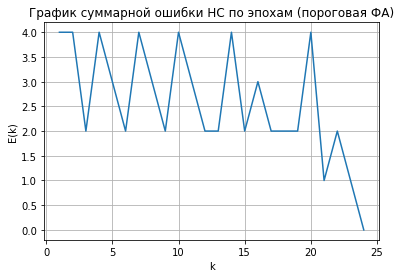

Обучение завершено. Потребовалось  18  эпох.
Полученные значения весов: w0 = -0.392 w1 = -0.052 w2 = 0.406 w3 = 0.129 w4 = 0.111


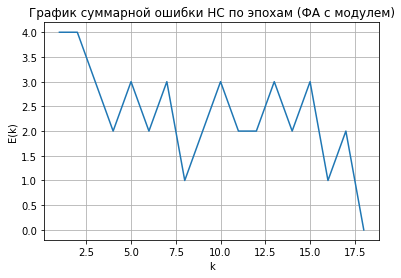

Минимальный набор пороговой ФА
Минимальный набор: {'x1': [0, 1, 1, 1], 'x2': [0, 0, 0, 1], 'x3': [0, 0, 1, 1], 'x4': [1, 0, 0, 1], 'F': [0, 0, 0, 1]}
Эпох потребовалось для обучения на минимальном наборе: 5
Число векторов в минимальном наборе: 4
Синаптические коэффициенты: [-0.8999999999999999, -0.3, 0.8999999999999999, 0.3, 0.3]
Минимальный набор ФА с модулем
Минимальный набор: {'x1': [0, 0, 1, 1], 'x2': [0, 1, 0, 1], 'x3': [0, 0, 0, 1], 'x4': [0, 1, 1, 1], 'F': [0, 1, 0, 1]}
Эпох потребовалось для обучения на минимальном наборе: 3
Число векторов в минимальном наборе: 4
Синаптические коэффициенты: [-0.11345535088742624, -0.052781765515081805, 0.16151771746997112, 0.07568753899511982, 0.033048412959769485]


In [143]:
if __name__ == "__main__":
    main()